<a href="https://colab.research.google.com/github/LuisGSVasconcelos/Redes_Neurais_PPGEQ_UFCG/blob/main/Victor/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data centering & scaling

In [58]:
# Standard scaling
import numpy as np
from sklearn.preprocessing import StandardScaler

X = np.array([[ 1000, 0.01,  300],
              [ 1200,  0.06,  350],
              [ 1500,  0.1, 320]])
scaler = StandardScaler().fit(X) # computes mean & std column-wise
X_scaled = scaler.transform(X) # transform using computed mean and std

# check mean = 0 and variance = 1 for every variable/column after scaling
print(X_scaled.mean(axis=0)) # return 1D array of size(3,1)
print(X_scaled.std(axis=0)) # return 1D array of size(3,1)

# access mean and variance via object properties
print(scaler.mean_) # return 1D array of size(3,1)
print(scaler.var_) # return 1D array of size(3,1)

[3.70074342e-16 7.40148683e-17 9.43689571e-16]
[1. 1. 1.]
[1.23333333e+03 5.66666667e-02 3.23333333e+02]
[4.22222222e+04 1.35555556e-03 4.22222222e+02]


In [59]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # create object
X_scaled = scaler.fit_transform(X) # fit & transform

# check min = 0 and max = 1 for every variable/column after scaling
print(X_scaled.min(axis=0))
print(X_scaled.max(axis=0))

# access min and max via object properties
print(scaler.data_min_)
print(scaler.data_max_)

[0. 0. 0.]
[1. 1. 1.]
[1.e+03 1.e-02 3.e+02]
[1.5e+03 1.0e-01 3.5e+02]


### Robust Centering & Scaling

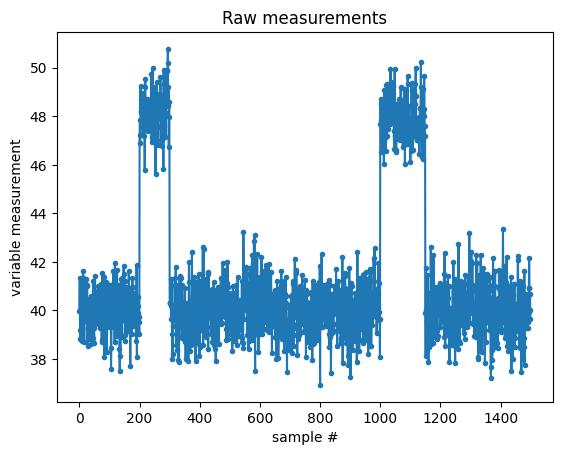

In [60]:
# Generate oulier-infested data
X = np.random.normal(40, 1, (1500,1))
X[200:300] = X[200:300] +8; X[1000:1150] = X[1000:1150] + 8

# plot
import matplotlib.pyplot as plt
plt.plot(X, '.-')
plt.xlabel('sample #'), plt.ylabel('variable measurement')
plt.title('Raw measurements')
plt.show()

Estimated mean =  41.35478841713105
Estimated standard deviation =  3.1671050868599746


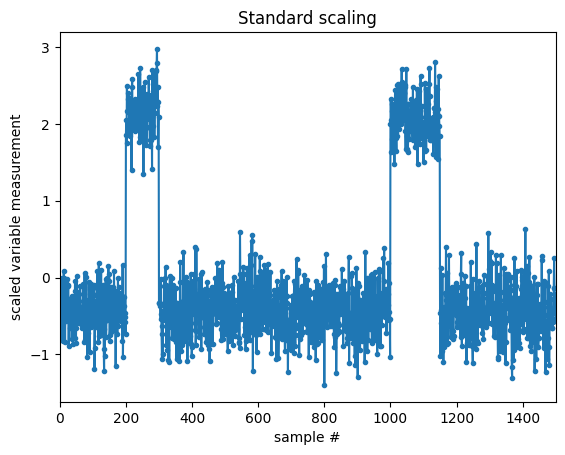

In [61]:
# Transform via standard scaling
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# mean and std
print('Estimated mean = ', scaler.mean_[0])
print('Estimated standard deviation = ', np.sqrt(scaler.var_[0]))

# plot
plt.figure()
plt.plot(X_scaled, '.-')
plt.xlabel('sample #'), plt.ylabel('scaled variable measurement')
plt.xlim((0,1500))
plt.title('Standard scaling')
plt.show()

Estimated robust location =  40.237958558174036
Estimated robust spread =  [0.86413242]


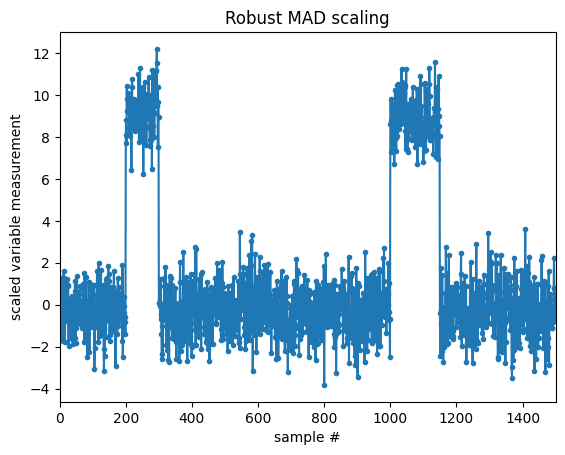

In [64]:
# Transform via robust MAD scaling
# compute median and MAD
from scipy import stats
median = np.median(X)
# Changed function name from median_absolute_deviation to median_abs_deviation
MAD = stats.median_abs_deviation(X)

# scale
X_scaled = (X - median)/MAD[0]

# median and MAD
print('Estimated robust location = ', median)
print('Estimated robust spread = ', MAD)

# plot
plt.figure()
plt.plot(X_scaled, '.-')
plt.xlabel('sample #'), plt.ylabel('scaled variable measurement')
plt.xlim((0,1500))
plt.title('Robust MAD scaling')
plt.show()

## Feature engineering

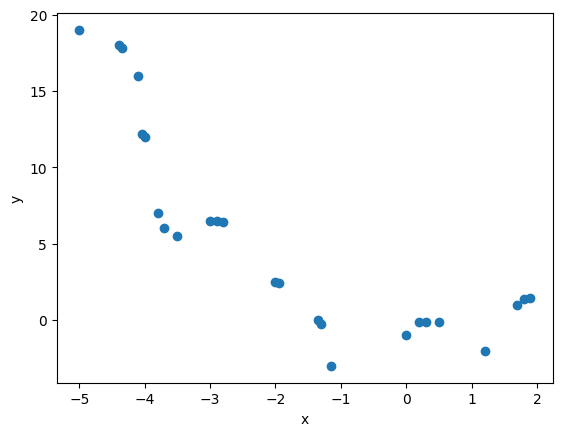

In [65]:
# read data
import numpy as np
data = np.loadtxt('quadratic_raw_data.csv', delimiter=',')
x = data[:,0,None]; y = data[:,1,None]

# plot
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,y, 'o')
plt.xlabel('x'), plt.ylabel('y')
plt.show()

In [66]:
# generate quadratic features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x) # X_poly: 1st column is x, 2nd column is x^2

In [67]:
# scale model inputs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [68]:
# linear fit & predict
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, y)
y_predicted = model.predict(X_poly)

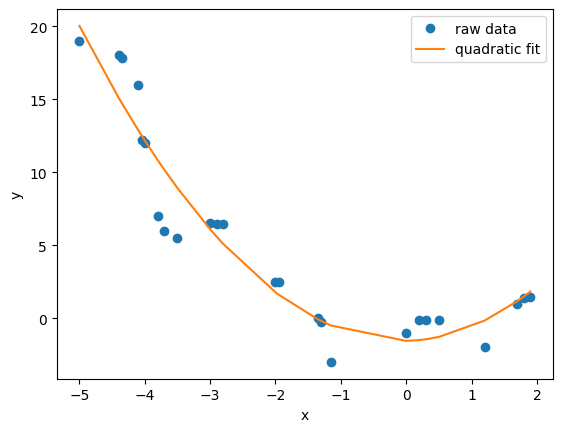

Fit accuracy =  0.9161437726284858


In [69]:
# check predictions
# plot
plt.figure()
plt.plot(x,y, 'o', label='raw data')
plt.plot(x,y_predicted, label='quadratic fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')
plt.show()

# accuracy
from sklearn.metrics import r2_score
print('Fit accuracy = ', r2_score(y, y_predicted))

### One-hot encoding

In [71]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

x = np.array([['type A'],
              ['type C'],
              ['type B'],
              ['type C']])
# In newer versions of scikit-learn, OneHotEncoder always returns a sparse matrix.
# To get a dense array, use the toarray() method.
ohe = OneHotEncoder(handle_unknown='ignore') # sparse=False is deprecated
X_encoded = ohe.fit_transform(x).toarray() # x in numerical form

print(X_encoded)
print(ohe.categories_)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
[array(['type A', 'type B', 'type C'], dtype='<U6')]


## Workflow automation via pipelines

In [72]:
# read data
import numpy as np
data = np.loadtxt('quadratic_raw_data.csv', delimiter=',')
x = data[:,0,None]; y = data[:,1,None]

In [73]:
# create pipeline for quadratic fit via linear model
# import relevant classes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# add transformers and estimators sequentially as list of tuples
# the names ‘poly’, ‘scaler’, ‘model’ can be used to access the individual elements of pipeline later
pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', LinearRegression())])

In [74]:
# fit pipeline and predict
pipe.fit(x, y)
y_predicted = pipe.predict(x)

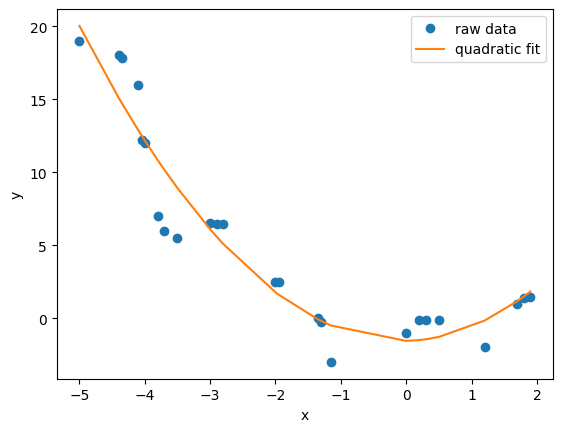

Fitting metric (R2) =  0.9161437726284858
Fitting metric (R2) =  0.9161437726284858


In [75]:
# check predictions
# plot
from matplotlib import pyplot as plt
plt.figure()
plt.plot(x,y, 'o', label='raw data')
plt.plot(x,y_predicted, label='quadratic fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')
plt.show()

# performance metric
from sklearn.metrics import r2_score
print('Fitting metric (R2) = ', r2_score(y, y_predicted))

# performance metric vis score method
print('Fitting metric (R2) = ', pipe.score(x,y)) # no need to import metrics module

## Holdout method / Cross-validation

In [50]:
# read data
import numpy as np
data = np.loadtxt('quadratic_raw_data.csv', delimiter=',')
x = data[:,0,None]; y = data[:,1,None]

In [51]:
# create pipeline for quadratic fit via linear model
# import relevant classes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# add transformers and estimators sequentially as list of tuples
# the names ‘poly’, ‘scaler’, ‘model’ can be used to access the individual elements of pipeline later
pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', LinearRegression())])

In [52]:
# separate training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print('Number of samples in training set: ', x_train.shape[0])
print('Number of samples in test set: ', x_test.shape[0])

Number of samples in training set:  20
Number of samples in test set:  5


In [56]:
# fit pipeline and predict
pipe.fit(x_train, y_train)
y_predicted_train = pipe.predict(x_train)
y_predicted_test = pipe.predict(x_test)

In [53]:
# performance metrics
from sklearn.metrics import mean_squared_error as mse

print('Training metric (mse) = ', mse(y_train, y_predicted_train))
print('Test metric (mse) = ', mse(y_test, y_predicted_test))

Training metric (mse) =  3.789080699843305
Test metric (mse) =  3.5558636543779985


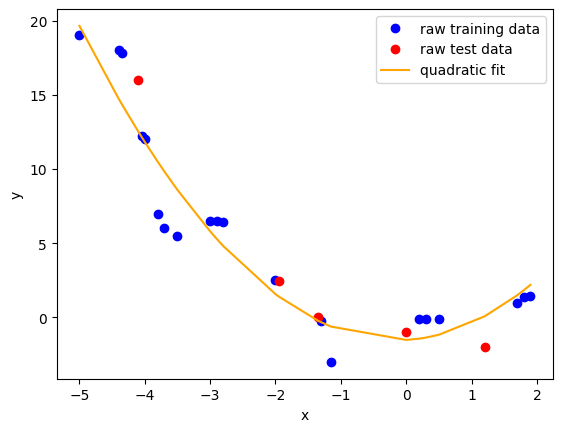

In [57]:
# plot predictions
y_predicted = pipe.predict(x)

from matplotlib import pyplot as plt
plt.figure()
plt.plot(x_train,y_train, 'bo', label='raw training data')
plt.plot(x_test,y_test, 'ro', label='raw test data')
plt.plot(x,y_predicted, color='orange', label='quadratic fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')
plt.show()

## Overfitting & underfitting

In [10]:
# separate fitting and validation data
from sklearn.model_selection import train_test_split
x_fit, x_val, y_fit, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

In [11]:
# assess performance on validation sets for different hyperparameter values
from sklearn.metrics import mean_squared_error as mse
fit_MSEs = []
validation_MSEs = []

In [12]:
for poly_degree in range(1,6):
  # set hyper-parameter value
  pipe['poly'].degree = poly_degree
  # fit & predict
  pipe.fit(x_fit, y_fit)
  y_pred_fit = pipe.predict(x_fit)
  y_pred_val = pipe.predict(x_val)
  # compute scores and append
  fit_MSE = mse(y_fit, y_pred_fit)
  validation_MSE = mse(y_val, y_pred_val)
  fit_MSEs.append(fit_MSE), validation_MSEs.append(validation_MSE)

(<matplotlib.legend.Legend at 0x7e7ee17bf550>,
 Text(0.5, 0, 'Polynomial degree'),
 Text(0, 0.5, 'MSE'))

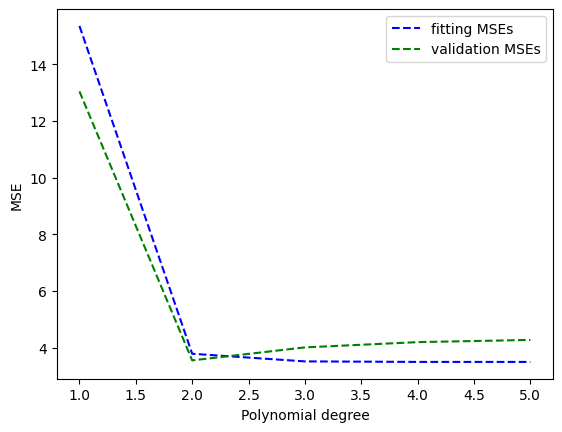

In [13]:
# plot validation curve
from matplotlib import pyplot as plt
plt.figure()
plt.plot(np.arange(1,6), fit_MSEs, 'b--', label='fitting MSEs')
plt.plot(np.arange(1,6), validation_MSEs, 'g--', label='validation MSEs')
plt.legend(), plt.xlabel('Polynomial degree'), plt.ylabel('MSE')

## Train/validation/test split

In [14]:
# train-validate-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_fit, x_val, y_fit, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=1)

In [15]:
print('Number of samples in fitting set: ', x_fit.shape[0])
print('Number of samples in validation set: ', x_val.shape[0])
print('Number of samples in test set: ', x_test.shape[0])

Number of samples in fitting set:  14
Number of samples in validation set:  6
Number of samples in test set:  5


## K-fold cross-validation

In [17]:
# separate training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [18]:
# generate k=3 folds on training data
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 3, shuffle = True, random_state = 1)

In [23]:
# compute validation performances using the K folds
from sklearn.metrics import mean_squared_error as mse
overall_fit_MSEs = [] # overall errors for different polynomial degrees
overall_val_MSEs = []

max_polyDegree = 5
for poly_degree in range(1,max_polyDegree+1):# loop over hyperparameters
    pipe['poly'].degree = poly_degree

    split_fit_MSEs = [] # errors for different splits
    split_val_MSEs = []

    for fit_indices, val_indices in kfold.split(x_train): # loop over splits
        x_fit = x_train[fit_indices]
        y_fit = y_train[fit_indices]
        x_val = x_train[val_indices]
        y_val = y_train[val_indices]

        # fit & predict
        pipe.fit(x_fit, y_fit)
        y_pred_fit = pipe.predict(x_fit)
        y_pred_val = pipe.predict(x_val)

        # compute average error and append
        split_fit_MSEs.append(mse(y_fit, y_pred_fit))
        split_val_MSEs.append(mse(y_val, y_pred_val))

    overall_fit_MSEs.append(np.mean(split_fit_MSEs))
    overall_val_MSEs.append(np.mean(split_val_MSEs))

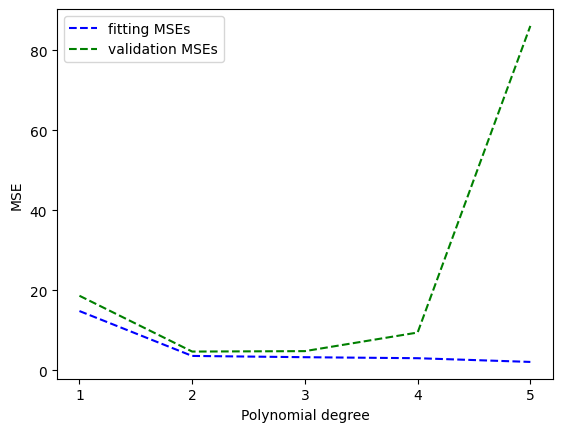

In [24]:
# plot validation curve
from matplotlib import pyplot as plt
plt.figure()
plt.plot(np.arange(1,max_polyDegree+1), overall_fit_MSEs, 'b--', label='fitting MSEs')
plt.plot(np.arange(1,max_polyDegree+1), overall_val_MSEs, 'g--', label='validation MSEs')
plt.legend(), plt.xlabel('Polynomial degree'), plt.ylabel('MSE')
plt.xticks(np.arange(1,max_polyDegree+1))
plt.show()

## Regularization

In [25]:
# read data
import numpy as np
data = np.loadtxt('quadratic_raw_data.csv', delimiter=',')
x = data[:,0,None]; y = data[:,1,None]

# separate training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Ordinary Least Squares Regression

In [26]:
# create pipeline for quadratic fit via OLS
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe_OLS = Pipeline([('poly', PolynomialFeatures(degree=10, include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', LinearRegression())])

In [27]:
# fit pipeline and predict
pipe_OLS.fit(x_train, y_train)
y_predicted_train_OLS = pipe_OLS.predict(x_train)
y_predicted_test_OLS = pipe_OLS.predict(x_test)

In [28]:
# performance metrics
from sklearn.metrics import mean_squared_error as mse

print('OLS Training metric (mse) = ', mse(y_train, y_predicted_train_OLS))
print('OLS Test metric (mse) = ', mse(y_test, y_predicted_test_OLS))

OLS Training metric (mse) =  0.3130714280718393
OLS Test metric (mse) =  6.950826348841896


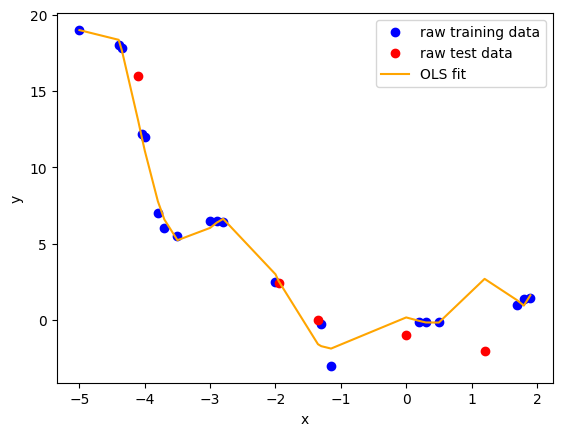

In [29]:
# plot predictions
y_predicted_OLS = pipe_OLS.predict(x)

from matplotlib import pyplot as plt
plt.figure()
plt.plot(x_train,y_train, 'bo', label='raw training data')
plt.plot(x_test,y_test, 'ro', label='raw test data')
plt.plot(x,y_predicted_OLS, color='orange', label='OLS fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')
plt.show()

In [30]:
# print coefficients
print(pipe_OLS['model'].coef_)

[[-1.96123403e+00 -1.70142862e+01  1.61112987e+02  5.53503743e+02
  -1.47185815e+03 -5.24500174e+03  9.88824037e+02  1.58830783e+04
   1.72273909e+04  5.73349950e+03]]


### Ridge Regression

In [31]:
# create pipeline for quadratic fit via ridge model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

pipe_L2 = Pipeline([('poly', PolynomialFeatures(degree=10,include_bias=False)),
                    ('scaler', StandardScaler()),
                    ('model', Ridge(alpha=0.1))])

In [32]:
# fit pipeline and predict
pipe_L2.fit(x_train, y_train)
y_predicted_train_L2 = pipe_L2.predict(x_train)
y_predicted_test_L2 = pipe_L2.predict(x_test)

In [33]:
# performance metrics
from sklearn.metrics import mean_squared_error as mse

print('L2 Training metric (mse) = ', mse(y_train, y_predicted_train_L2))
print('L2 Test metric (mse) = ', mse(y_test, y_predicted_test_L2))

L2 Training metric (mse) =  3.197250376366914
L2 Test metric (mse) =  3.44747159916285


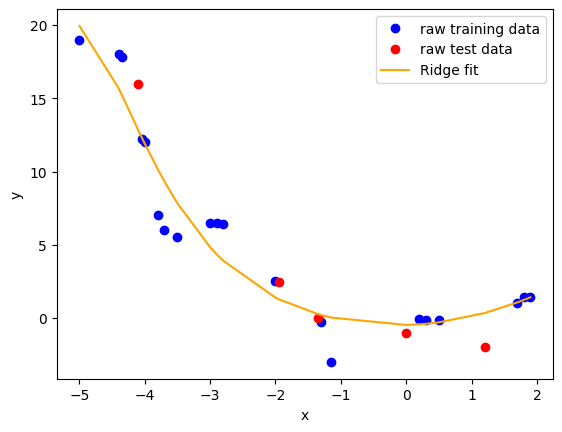

In [34]:
# plot predictions
y_predicted_L2 = pipe_L2.predict(x)

plt.figure()
plt.plot(x_train,y_train, 'bo', label='raw training data')
plt.plot(x_test,y_test, 'ro', label='raw test data')
plt.plot(x,y_predicted_L2, color='orange', label='Ridge fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')
plt.show()

In [35]:
# print coefficients
print(pipe_L2['model'].coef_)

[ 0.27326159  3.49270237 -0.35861471  0.59074719 -1.20522322  1.9065296
 -1.80640701  0.86690221  0.87244476 -3.20685088]


### Lasso Regression

In [36]:
# create pipeline for quadratic fit via ridge model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

pipe_L1 = Pipeline([('poly', PolynomialFeatures(degree=10,include_bias=False)),
                    ('scaler', StandardScaler()),
                    ('model', Lasso(alpha=0.1))])

In [37]:
# fit pipeline and predict
pipe_L1.fit(x_train, y_train)
y_predicted_train_L1 = pipe_L1.predict(x_train)
y_predicted_test_L1 = pipe_L1.predict(x_test)

In [38]:
# performance metrics
from sklearn.metrics import mean_squared_error as mse

print('L1 Training metric (mse) = ', mse(y_train, y_predicted_train_L1))
print('L1 Test metric (mse) = ', mse(y_test, y_predicted_test_L1))

L1 Training metric (mse) =  3.5966292903741506
L1 Test metric (mse) =  3.9280112362976114


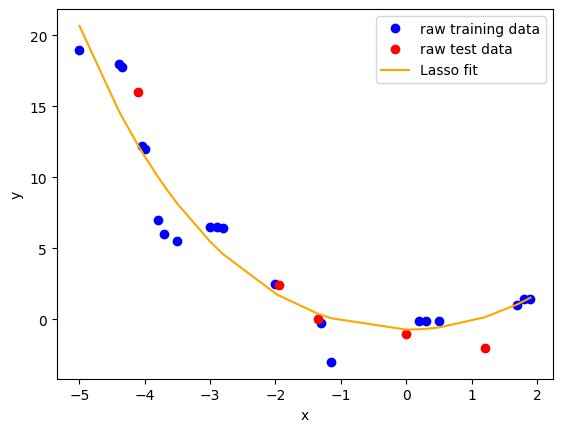

In [39]:
# plot predictions
y_predicted_L1 = pipe_L1.predict(x)

plt.figure()
plt.plot(x_train,y_train, 'bo', label='raw training data')
plt.plot(x_test,y_test, 'ro', label='raw test data')
plt.plot(x,y_predicted_L1, color='orange', label='Lasso fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')
plt.show()

In [40]:
# print coefficients
print(pipe_L1['model'].coef_)

[-0.          4.38109181 -0.09273215  1.679048   -0.          0.
 -0.          0.          0.         -0.        ]


### Combined plot

(Text(0.5, 0, 'x'), Text(0, 0.5, 'y'))

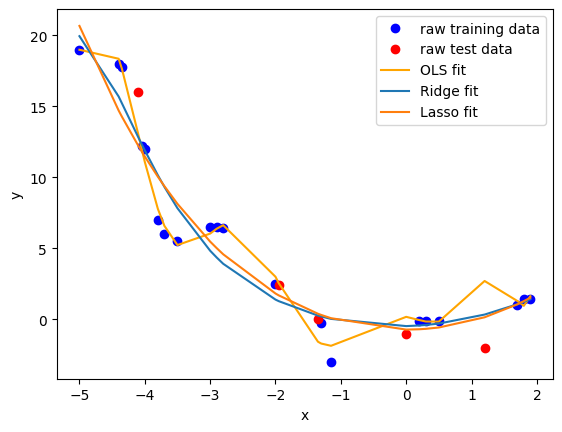

In [42]:
plt.figure()
plt.plot(x_train,y_train, 'bo', label='raw training data')
plt.plot(x_test,y_test, 'ro', label='raw test data')
plt.plot(x,y_predicted_OLS, color='orange', label='OLS fit')
plt.plot(x,y_predicted_L2, label='Ridge fit')
plt.plot(x,y_predicted_L1, label='Lasso fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')

## Hyperparameter optimization via GridSearchCV

In [43]:
# read data
import numpy as np
data = np.loadtxt('quadratic_raw_data.csv', delimiter=',')
x = data[:,0,None]; y = data[:,1,None]

In [44]:
# create pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe = Pipeline([('poly', PolynomialFeatures(include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', LinearRegression())])

In [45]:
# separate fitting and validation data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [46]:
# find optimal hyperparameter via GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'poly__degree': np.arange(1,6)}
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=3)
gs.fit(x_train, y_train)

print('Optimal hyperparameter:', gs.best_params_)

Optimal hyperparameter: {'poly__degree': np.int64(2)}


In [47]:
# get best model and predict
pipe_best = gs.best_estimator_
y_predicted_train = pipe_best.predict(x_train) # can also use gs.predict(x_train)
y_predicted_test = pipe_best.predict(x_test) # can also use gs.predict(x_test)

In [48]:
# performance metrics
from sklearn.metrics import mean_squared_error as mse

print('Training metric (mse) = ', mse(y_train, y_predicted_train))
print('Test metric (mse) = ', mse(y_test, y_predicted_test))

Training metric (mse) =  3.789080699843305
Test metric (mse) =  3.5558636543779985


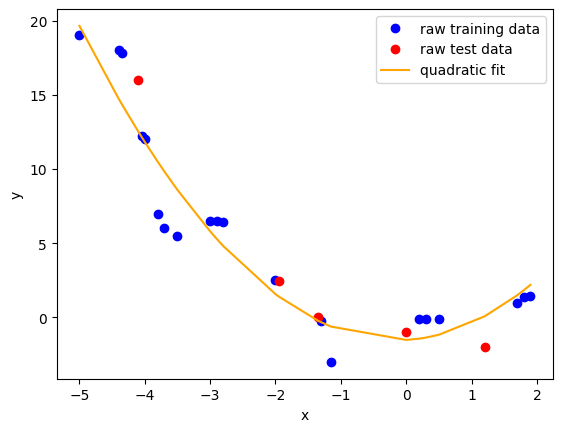

In [49]:
# plot predictions
y_predicted = pipe_best.predict(x)

from matplotlib import pyplot as plt
plt.figure()
plt.plot(x_train,y_train, 'bo', label='raw training data')
plt.plot(x_test,y_test, 'ro', label='raw test data')
plt.plot(x,y_predicted, color='orange', label='quadratic fit')
plt.legend()
plt.xlabel('x'), plt.ylabel('y')
plt.show()